# UBER Assignment

### Business Objectives
The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation. As a result of your analysis, you should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them. 

### Metadata
- Request id: A unique identifier of the request
- Time of request: The date and time at which the customer made the trip request
- Drop-off time: The drop-off date and time, in case the trip was completed 
- Pick-up point: The point from which the request was made
- Driver id: The unique identification number of the driver
- Status of the request: The final status of the trip, that can be either completed, cancelled by the driver or no cars available

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Data

In [2]:
uber = pd.read_csv('C:/Users/Karthik Bhat/Documents/PGDDS/Python/Assignment/UBER Assignment/Uber Request Data.csv')

In [3]:
uber.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [4]:
# Checking for data types for each column
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [5]:
uber.shape
# So there are total 6745 records

(6745, 6)

In [6]:
uber

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [7]:
# If duplcate requests are recorded
sum(uber['Request id'].value_counts()>1)

0

### Data Cleaning

Checking for null value

In [8]:
uber.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [9]:
print(uber['Status'].value_counts())
print(' - For "No car available"')
print(uber[uber['Status']=='No Cars Available'].isnull().sum())
print(' - For "Cancelled"')
print(uber[uber['Status']=='Cancelled'].isnull().sum())
print(2650+1264)
# All the blank values are valid

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64
 - For "No car available"
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       2650
dtype: int64
 - For "Cancelled"
Request id              0
Pickup point            0
Driver id               0
Status                  0
Request timestamp       0
Drop timestamp       1264
dtype: int64
3914


In [10]:
# Driver id put as 0 if NA
uber['Driver id'].fillna(0,inplace=True)

Changing of data type for below features:
1. Request id
2. Driver id
3. Request timestamp
4. Drop timestamp

In [11]:
# converting Requestid to categorical variable
uber['Request id'] = uber['Request id'].astype(str)

In [12]:
# converting Driverid to categorical variable
uber['Driver id'] = uber['Driver id'].astype(int)
uber['Driver id'] = uber['Driver id'].astype(str)

In [13]:
# converting Request timestamp to datetime
uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'],dayfirst=True)

In [14]:
# converting Drop timestamp to datetime
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp'],dayfirst=True)

Checking if Drop time is before request time

In [16]:
uber.loc[uber['Drop timestamp']<uber['Request timestamp'],:]
# There are no records with older request date than drop date.

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


Checking if difference between Request and drop is not huge.

In [17]:
uber[(uber['Drop timestamp']-uber['Request timestamp'])>dt.timedelta(1)]
# It certainly can't take more than one day to fro airport.

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


### Derived Metrics

We can bin the request time into various categories:
1. Early Morning: 00:00:00 to 03:00:00
2. Mid Morning: 03:00:01 to 06:00:00
3. Late Morning: 06:00:01 to 09:00:00
4. Before Noon: 09:00:01 to 12:00:00
5. After Noon: 12:00:01 to 15:00:00
6. Evening: 15:00:01 to 18:00:00
7. Late Evening: 18:00:01 to 21:00:00
8. Night: 21:00:01 to 23:59:59

In [18]:
# Binning time into part of the day as per above
uber.loc[(uber.loc[:,'Request timestamp'].dt.time >= dt.time(0,0,0)) & (uber.loc[:,'Request timestamp'].dt.time <= dt.time(3,0,0)),'Day_part'] = 'Early Morning'
uber.loc[(uber.loc[:,'Request timestamp'].dt.time > dt.time(3,0,1)) & (uber.loc[:,'Request timestamp'].dt.time <= dt.time(6,0,0)),'Day_part'] = 'Mid Morning'
uber.loc[(uber.loc[:,'Request timestamp'].dt.time > dt.time(6,0,1)) & (uber.loc[:,'Request timestamp'].dt.time <= dt.time(9,0,0)),'Day_part'] = 'Late Morning'
uber.loc[(uber.loc[:,'Request timestamp'].dt.time > dt.time(9,0,1)) & (uber.loc[:,'Request timestamp'].dt.time <= dt.time(12,0,0)),'Day_part'] = 'Before Noon'
uber.loc[(uber.loc[:,'Request timestamp'].dt.time > dt.time(12,0,1)) & (uber.loc[:,'Request timestamp'].dt.time <= dt.time(15,0,0)),'Day_part'] = 'After Noon'
uber.loc[(uber.loc[:,'Request timestamp'].dt.time > dt.time(15,0,1)) & (uber.loc[:,'Request timestamp'].dt.time <= dt.time(18,0,0)),'Day_part'] = 'Evening'
uber.loc[(uber.loc[:,'Request timestamp'].dt.time > dt.time(18,0,1)) & (uber.loc[:,'Request timestamp'].dt.time <= dt.time(21,0,0)),'Day_part'] = 'Late Evening'
uber.loc[(uber.loc[:,'Request timestamp'].dt.time > dt.time(21,0,1)) & (uber.loc[:,'Request timestamp'].dt.time <= dt.time(23,59,59)),'Day_part'] = 'Night'

To check how much time each ride took (in Min):

In [19]:
uber['Ride_time'] = uber['Drop timestamp'] - uber['Request timestamp']

In [20]:
uber['Ride_time'] = pd.DatetimeIndex(uber['Ride_time']).hour*60 + pd.DatetimeIndex(uber['Ride_time']).minute

In [21]:
uber.loc[uber['Pickup point']=='Airport','Path'] = 'Airport_to_City'
uber.loc[uber['Pickup point']=='City','Path'] = 'City_to_Airport'

In [22]:
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Day_part,Ride_time,Path
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Before Noon,69.0,Airport_to_City
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Evening,50.0,Airport_to_City
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Before Noon,41.0,City_to_Airport
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Night,55.0,Airport_to_City
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Late Morning,52.0,City_to_Airport


In [23]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 9 columns):
Request id           6745 non-null object
Pickup point         6745 non-null object
Driver id            6745 non-null object
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Day_part             6745 non-null object
Ride_time            2831 non-null float64
Path                 6745 non-null object
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 474.3+ KB


### Univariate Analysis

Lets take each of the variable and find the distribution

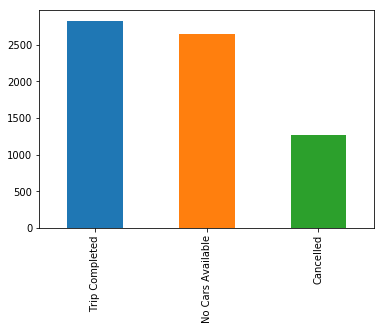

In [24]:
# Count on Status
uber['Status'].value_counts().plot(kind='bar')

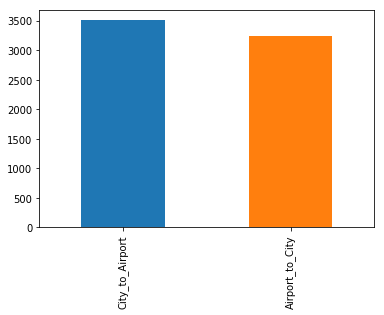

In [25]:
# Count on Trip Path
uber['Path'].value_counts().plot(kind='bar')

In [26]:
# Count on part of the day
uber['Day_part'].value_counts()

Late Evening     1475
Late Morning     1226
Night             944
Before Noon       845
Evening           749
Mid Morning       741
After Noon        482
Early Morning     283
Name: Day_part, dtype: int64

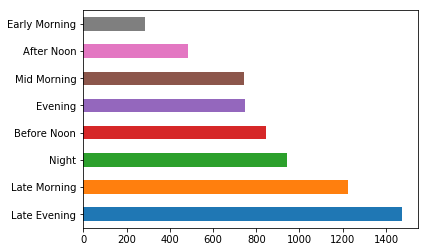

In [27]:
# Count on part of the day
uber['Day_part'].value_counts().plot(kind='barh')

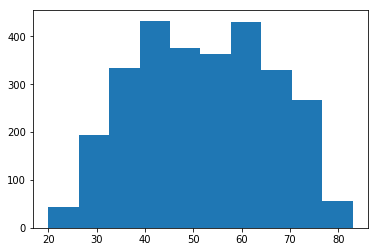

In [28]:
# Histogram on ride time
uber['Ride_time'].hist(bins=10,grid=False)

With above Univariate analysis Below points can be concluded:
1. No Cabs Available is twice that of cancelled.
2. There slightly more requests on City to Airport than Airport to city
3. Most of the requests came on Late evenings(6PM to 9PM) followed by Late Morning(6AM to 9AM)
4. Majority of trip takes 40 to 60 mins travel duration.

Rank of Part of day for requests:
1. Late Evening     1475
2. Late Morning     1226
3. Night             944
4. Before Noon       845
5. Evening           749
6. Mid Morning       741
7. After Noon        482
8. Early Morning     283

### Segmented Analysis

Lets see when is the requests are coming in for trips:

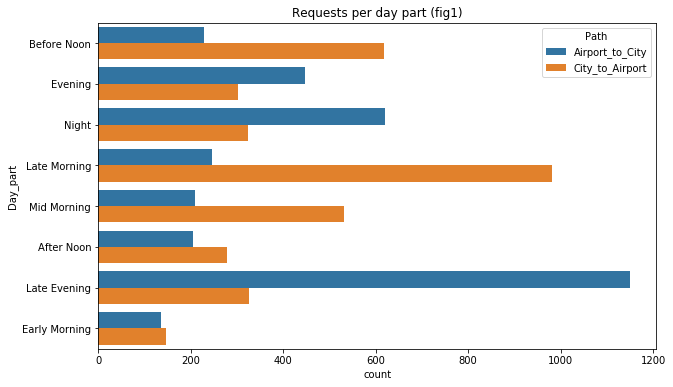

In [29]:
# Total requests grouped by Path
fig = plt.figure(figsize=(10,6))
sns.countplot(y='Day_part',hue='Path',data=uber)
plt.title('Requests per day part (fig1)')
plt.show()

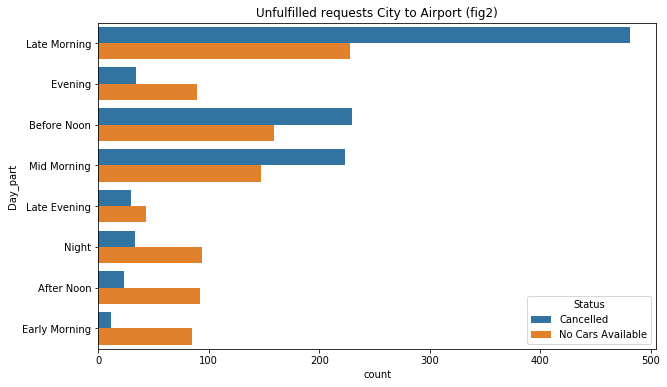

In [30]:
# Unfulfilled requests from City to Airport
fig = plt.figure(figsize=(10,6))
sns.countplot(y='Day_part',hue='Status',data=uber[(uber['Status']!='Trip Completed') & (uber['Path']=='City_to_Airport')])
plt.title('Unfulfilled requests City to Airport (fig2)')
plt.show()

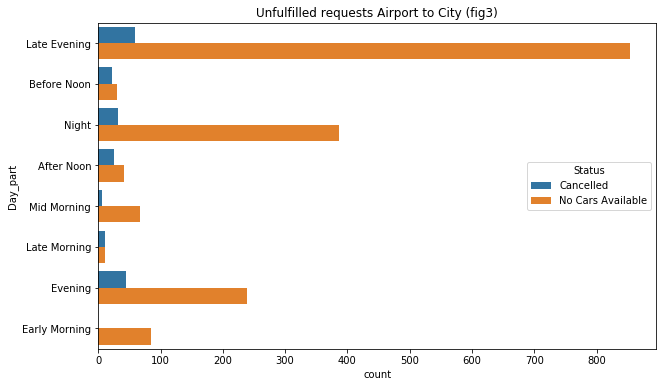

In [31]:
# Unfulfilled requests from Airport to City
fig = plt.figure(figsize=(10,6))
sns.countplot(y='Day_part',hue='Status',data=uber[(uber['Status']!='Trip Completed') & (uber['Path']=='Airport_to_City')])
plt.title('Unfulfilled requests Airport to City (fig3)')
plt.show()

1. Visually identify the most pressing problems for Uber:
 - High number of requests from Airport to city in **Late Evening and Night** ref.(fig1). But most of them unattended because of **No Cars Available** ref.(fig3)
 - High number of requests from City to Airport in **Mid Morning, Late Morning and Before Noon** ref.(fig1). But most of them unattended because of **cancellation**.(fig2)
 - There are high number of Cancellation recorded for City to Airport trip where as Car availability issues for Airport to City trip.

In [32]:
# Total Metrics for Demand Supply and Gap
Total_Demand = uber.groupby('Day_part')['Request id'].agg(['count'])
Total_Supply = uber[uber['Status']=='Trip Completed'].groupby('Day_part')['Request id'].agg(['count'])
DS_Total = pd.concat([Total_Demand['count'],Total_Supply['count']],axis=1,keys=['Demand','Supply'])
DS_Total['Gap'] = DS_Total['Demand']-DS_Total['Supply']

In [33]:
# Airport Metrics for Demand, Supply, Gap, Cancelled and Unavailable
Airport_Demand = uber[uber['Path']=='Airport_to_City'].groupby('Day_part')['Request id'].agg(['count'])
Airport_Supply = uber[(uber['Path']=='Airport_to_City')&(uber['Status']=='Trip Completed')].groupby('Day_part')['Request id'].agg(['count'])
Airport_Cancelled = uber[(uber['Path']=='Airport_to_City')&(uber['Status']=='Cancelled')].groupby('Day_part')['Request id'].agg(['count'])
Airport_Unavailable = uber[(uber['Path']=='Airport_to_City')&(uber['Status']=='No Cars Available')].groupby('Day_part')['Request id'].agg(['count'])
DS_Airport = pd.concat([Airport_Demand['count'],Airport_Supply['count'],Airport_Cancelled['count'],Airport_Unavailable['count']],axis=1,keys=['Demand','Supply','Cancelled','Unavailable'])
DS_Airport['Gap'] = DS_Airport['Demand']-DS_Airport['Supply']

In [34]:
# City Metrics for Demand, Supply, Gap, Cancelled and Unavailable
City_Demand = uber[uber['Path']=='City_to_Airport'].groupby('Day_part')['Request id'].agg(['count'])
City_Supply = uber[(uber['Path']=='City_to_Airport')&(uber['Status']=='Trip Completed')].groupby('Day_part')['Request id'].agg(['count'])
City_Cancelled = uber[(uber['Path']=='City_to_Airport')&(uber['Status']=='Cancelled')].groupby('Day_part')['Request id'].agg(['count'])
City_Unavailable = uber[(uber['Path']=='City_to_Airport')&(uber['Status']=='No Cars Available')].groupby('Day_part')['Request id'].agg(['count'])
DS_City = pd.concat([City_Demand['count'],City_Supply['count'],City_Cancelled['count'],City_Unavailable['count']],axis=1,keys=['Demand','Supply','Cancelled','Unavailable'])
DS_City['Gap'] = DS_City['Demand']-DS_City['Supply']

In [35]:
print(DS_Total)
print('--'*20)
print('Mean values from Airport:')
print(DS_Total.describe().mean())

               Demand  Supply  Gap
Day_part                          
After Noon        482     300  182
Before Noon       845     404  441
Early Morning     283     102  181
Evening           749     343  406
Late Evening     1475     490  985
Late Morning     1226     495  731
Mid Morning       741     298  443
Night             944     399  545
----------------------------------------
Mean values from Airport:
Demand    684.812860
Supply    272.711571
Gap       414.522163
dtype: float64


In [36]:
print(DS_Airport)
print('--'*20)
print('Mean values from Airport:')
print(DS_Airport.describe().mean())

               Demand  Supply  Cancelled  Unavailable  Gap
After Noon        204     137       25.0           42   67
Before Noon       228     176       22.0           30   52
Early Morning     136      52        NaN           84   84
Evening           446     163       44.0          239  283
Late Evening     1149     237       59.0          853  912
Late Morning      245     223       11.0           11   22
Mid Morning       209     136        6.0           67   73
Night             621     203       31.0          387  418
----------------------------------------
Mean values from Airport:
Demand         371.489215
Supply         129.536460
Cancelled       24.717536
Unavailable    220.622272
Gap            243.016238
dtype: float64


In [37]:
print(DS_City)
print('--'*20)
print('Mean values from City:')
print(DS_City.describe().mean())

               Demand  Supply  Cancelled  Unavailable  Gap
Day_part                                                  
After Noon        278     163         23           92  115
Before Noon       617     228        230          159  389
Early Morning     147      50         12           85   97
Evening           303     180         34           89  123
Late Evening      326     253         30           43   73
Late Morning      981     272        481          228  709
Mid Morning       532     162        223          147  370
Night             323     196         33           94  127
----------------------------------------
Mean values from City:
Demand         376.681262
Supply         146.503493
Cancelled      135.997628
Unavailable     98.121337
Gap            234.223892
dtype: float64


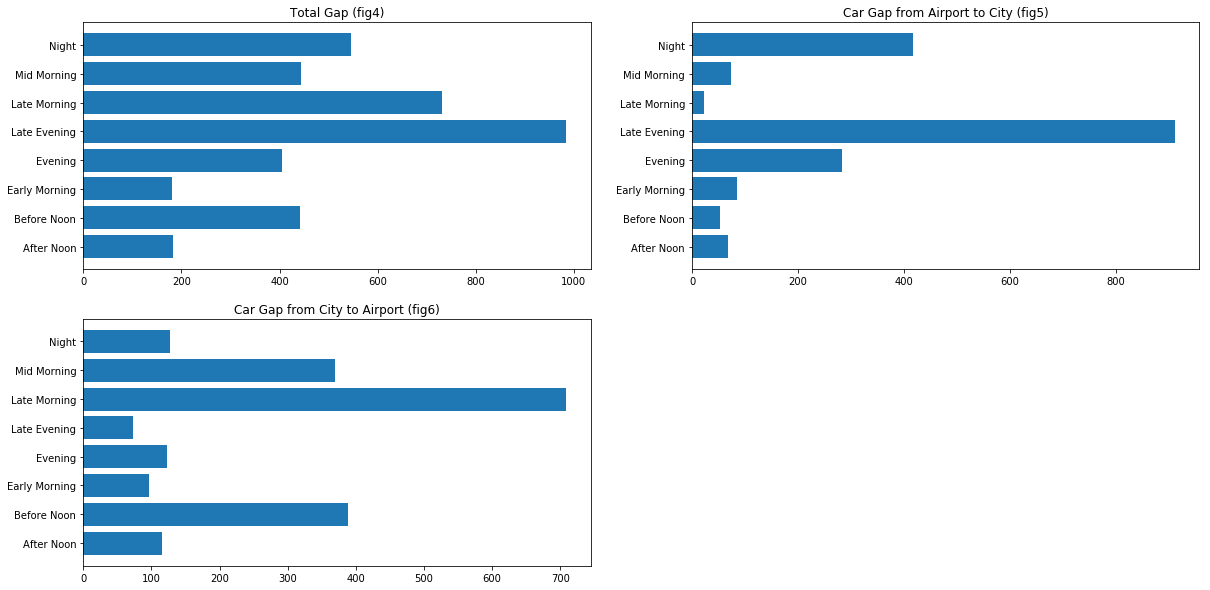

In [38]:
# To compare the gaps between both the paths and total
fig = plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.barh(DS_Total.index,DS_Total.Gap.values)
plt.title('Total Gap (fig4)')

plt.subplot(2,2,2)
plt.barh(DS_Airport.index,DS_Airport.Gap.values)
plt.title('Car Gap from Airport to City (fig5)')

plt.subplot(2,2,3)
plt.barh(DS_City.index,DS_City.Gap.values)
plt.title('Car Gap from City to Airport (fig6)')
plt.show()


2. Find out the gap between supply and demand and show the same using plots.
 - a) Find the time slots when the highest gap exists
     - Overall the highest gap exists in Late Evening i.e. 6PM to 9PM
 - b) Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots
      - Maximum gap is present in airport during Late Evenings

#### Now we know there is a supply demand gap and where exactly it is present.

In [39]:
# Correlation between Airport Demand and City Gap
np.corrcoef(DS_Airport['Demand'],DS_City['Gap'])[1][0]

-0.407860091772496

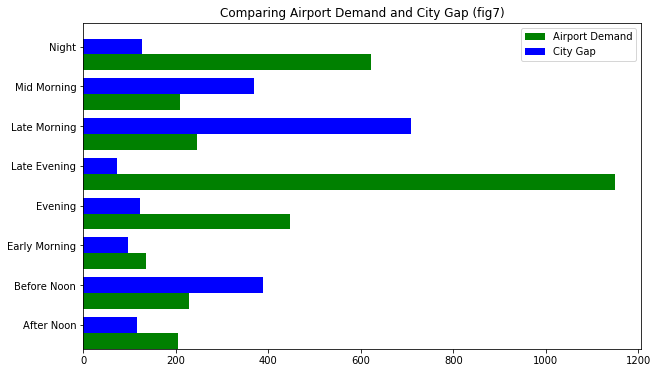

In [40]:
# Comparing Airport Demand and City Gap
fig,ax = plt.subplots(figsize=(10,6))
ind = np.arange(len(DS_Airport))
width = 0.4
ax.barh(ind,DS_Airport.Demand.values,width,color='green',label='Airport Demand')
ax.barh(ind+width,DS_City.Gap.values,width,color='blue',label='City Gap')
ax.set(yticks=ind + width, yticklabels=DS_Airport.index, ylim=[2*width - 1, len(DS_Airport)])
ax.legend()
plt.title('Comparing Airport Demand and City Gap (fig7)')
plt.show()

In [41]:
# Correlation between City Demand and Airport Gap
np.corrcoef(DS_City['Demand'],DS_Airport['Gap'])[1][0]

-0.34758821456097155

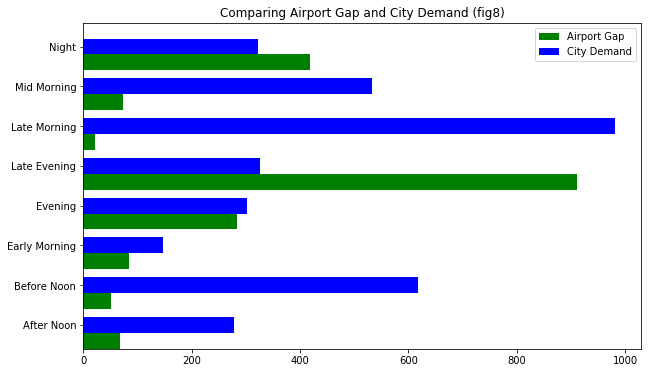

In [42]:
# Comparing Airport Gap and City Demand
fig,ax = plt.subplots(figsize=(10,6))
ind = np.arange(len(DS_Airport))
width = 0.4
ax.barh(ind,DS_Airport.Gap.values,width,color='green',label='Airport Gap')
ax.barh(ind+width,DS_City.Demand.values,width,color='blue',label='City Demand')
ax.set(yticks=ind + width, yticklabels=DS_Airport.index, ylim=[2*width - 1, len(DS_Airport)])
ax.legend()
plt.title('Comparing Airport Gap and City Demand (fig8)')
plt.show()

In [43]:
# Percentage of City Supply to Airport Demand
(DS_City.loc['Late Evening','Supply']/DS_Airport.loc['Late Evening','Demand'])*100

22.01914708442124

In [44]:
# Percentage of Airport demand to City Demand
(DS_Airport.loc['Late Morning','Demand']/DS_City.loc['Late Morning','Demand'])*100

24.97451580020387

In [45]:
# Percentage of Airport demand to City Supply
(DS_Airport.loc['Late Morning','Demand']/DS_City.loc['Late Morning','Supply'])*100

90.07352941176471

3. What do you think is the reason for this issue for the supply-demand gap?
    - City supply-demand gap is huge during low Demand in Airport. Chart in Fig7 and -ve correlation between Airport Demand and City Gap clearly gives this insight. Airport demand contributes to 24% of City Demand. Drivers hesitate to take rides from City to Airport whenever there is a low Airport demand. This causes more cancellation. Even after this huge City-Airport cancellation, city cab supply is covering 90% of Airport demand. 
    - Low City cab supply is causing High Airport Supply-Demand Gap and unavailability. City supplies 22% of Airport Demand during Late Evenings. City to airport cab demand is low but there is high demand in airport. 

4. Recommendations:
     - To award waiting allowances for airport waiting.
     - To penalize driver who has more number of cancellations.
     - To provide surged prices from Airport to City during peak hours.
     - To promote lower cost Shared cabs from Airport to City benefiting both customers and drivers.